### Imports

In [1]:
import sys
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Caminho da pasta "Twitch"
base_dir = Path(os.getcwd()).resolve().parent  # Ajuste se necessário

# Adicionar as pasta ao sys.path
visualization_dir = base_dir / 'src' / 'visualization'
getData_dir = base_dir / 'src' / 'data'
sys.path.append(str(visualization_dir))
sys.path.append(str(getData_dir))

# Importar os módulos
try:
    import TwitchGraphs
except ImportError:
    print("Erro: Não foi possível importar algum módulo. Verifique se o caminho está correto.")

# Paises
countries = ["PTBR", "DE", "ENGB", "ES", "FR", "RU"]

# Configuração de estilo dos gráficos
TwitchGraphs.setup_style()

In [2]:
# Alterar o país para analisar
country = 'ENGB'

## Visualizar os novos Dados

### Guardar os dados em um dicionário

In [3]:
# Criar um dicionário para armazenar os dataframes
dfs = {}

# Carregar dados para cada país
for country1 in countries:
    file_path = base_dir / 'data' / country1 / 'processed_data' / f'Raw_musae_{country1}_target.csv'
    dfs[country1] = pd.read_csv(file_path)

In [4]:
countryData = dfs[country]
print(countryData)

markdown_conteudo = f"# Análise da Região {country}"
# Em vez de criar os gráficos diretamente, usar as funções do TwitchGraphs
output_dir = base_dir / 'docs' / "Imagens"

             id  days  mature  views  partner  new_id            username  \
0      73045350  1459   False   9528    False    2299     CaptainTeabeard   
1      61573865  1629    True   3615    False     153         AwakenedOne   
2     171688860   411    True  46546    False     397  CharlotteSomething   
3     117338954   953    True   5863    False    5623     Mochi_Green_Tea   
4     135804217   741    True   5594    False    5875     onewithtehforce   
...         ...   ...     ...    ...      ...     ...                 ...   
7121   23831198  2624   False   3174    False    3794          Webbie17er   
7122   41433855  2035    True   3158    False    6534           SL1CKSHOT   
7123   75862831  1418    True   3839    False    2041    AshmaniaksAsylum   
7124   41041370  2046    True   6208    False    6870           JoeShowUK   
7125   51241925  1797   False   3545    False    3919        supasoulja85   

      created_at                                        profile_pic  \
0   

In [5]:
display(Markdown(markdown_conteudo))

# Análise da Região ENGB

In [6]:
print(f"\n=== Análise para {country} ===")

# Tipos de dados
print("\nTipos de dados:")
print(countryData.dtypes)



=== Análise para ENGB ===

Tipos de dados:
id                   int64
days                 int64
mature                bool
views                int64
partner               bool
new_id               int64
username            object
created_at          object
profile_pic         object
broadcaster_type    object
game_name           object
dtype: object


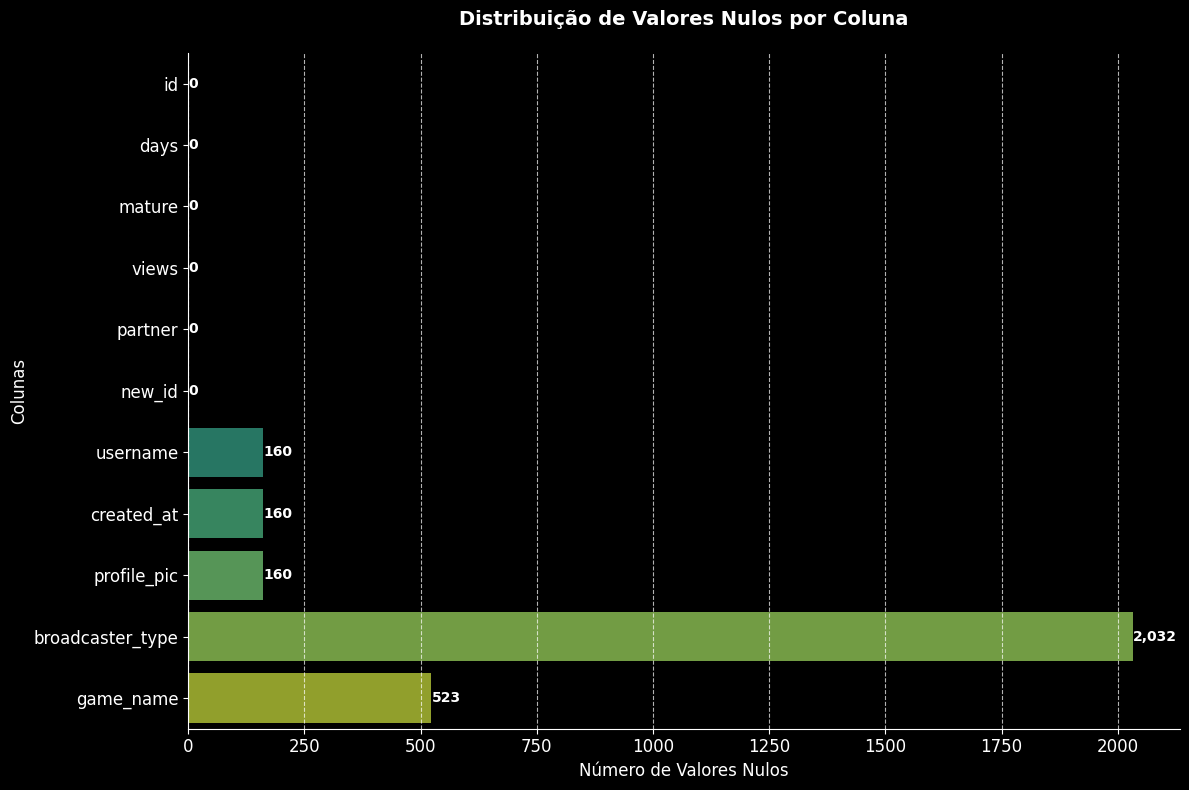

In [7]:
TwitchGraphs.plot_null_distribution(countryData, country, output_dir)

In [8]:
# Guardar o número de linhas original
linhas_originais = len(countryData)

# Atualizar a coluna 'broadcaster_type' com base nos valores nulos em 'username'
df_clean = countryData.copy()
df_clean.loc[df_clean['username'].isna(), 'broadcaster_type'] = 'account_Deleted'
df_clean.loc[df_clean['broadcaster_type'].isna(), 'broadcaster_type'] = 'non_Streamer'

# Mostrar informação sobre as linhas modificadas
linhas_modificadas = len(df_clean[df_clean['broadcaster_type'] == 'account_Deleted'])
print(f"Linhas originais: {linhas_originais}")
print(f"Linhas com username nulo alteradas para 'account_Deleted': {linhas_modificadas}")
print(f"Linhas após processamento: {len(df_clean)}")
print(f"Percentagem de dados mantidos: {(len(df_clean)/linhas_originais)*100:.2f}%")

Linhas originais: 7126
Linhas com username nulo alteradas para 'account_Deleted': 160
Linhas após processamento: 7126
Percentagem de dados mantidos: 100.00%


broadcaster_type
affiliate          4638
non_Streamer       1872
partner             456
account_Deleted     160
Name: count, dtype: int64


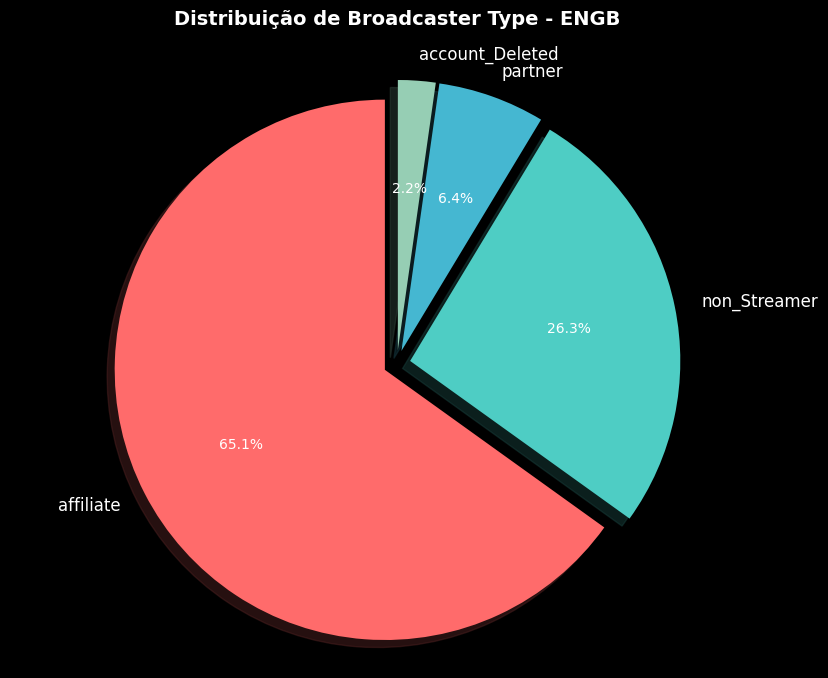

In [9]:
TwitchGraphs.plot_broadcaster_distribution(df_clean, country, output_dir)

mature
True     3888
False    3238
Name: count, dtype: int64


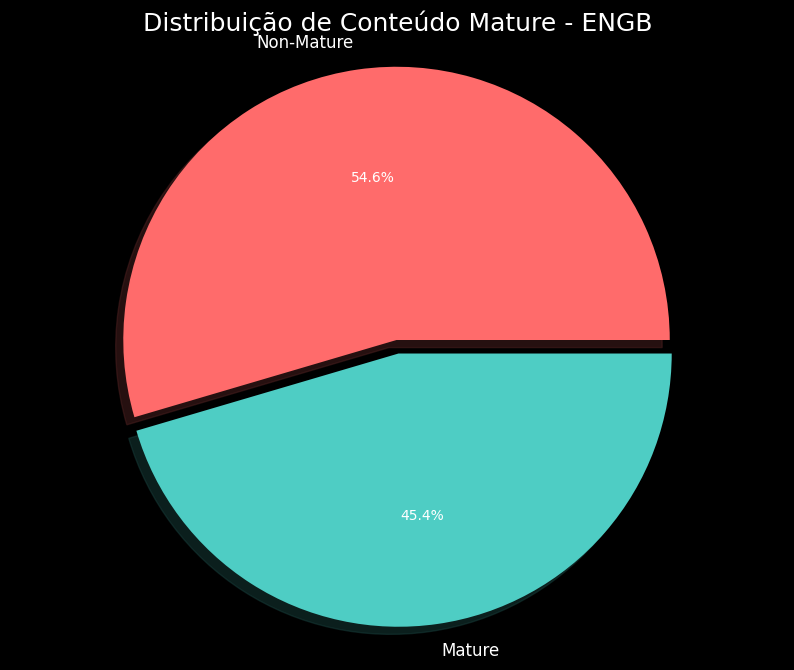

In [10]:
# Usar as funções do TwitchGraphs para criar os gráficos
TwitchGraphs.plot_mature_content(df_clean, country, output_dir)

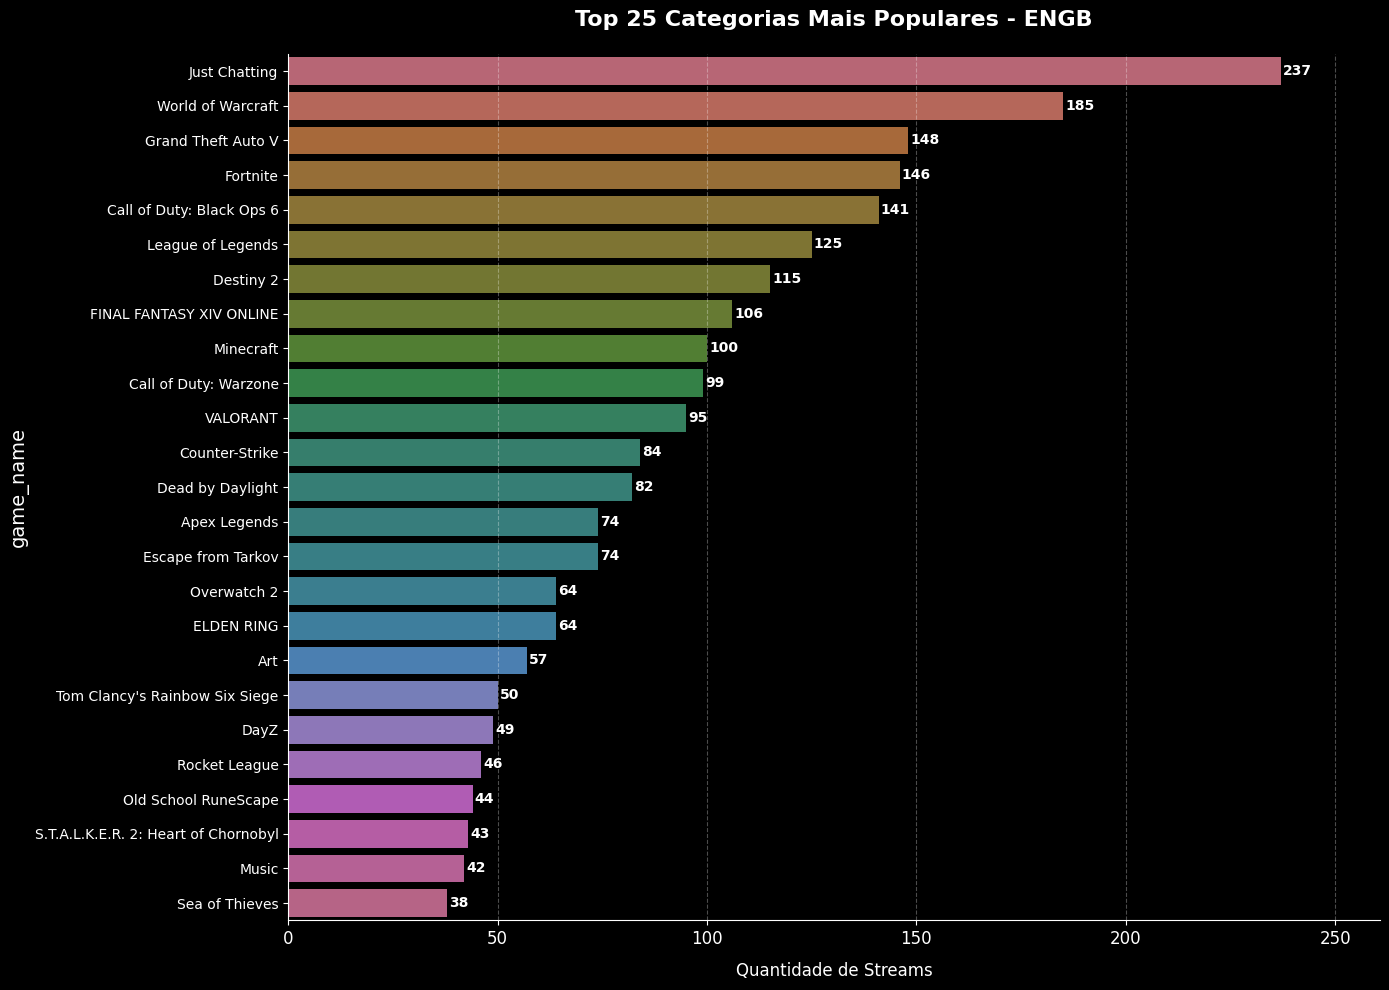

In [11]:
TwitchGraphs.plot_game_categories(df_clean, country, output_dir)

In [12]:
# Definir o nome da nova pasta
new_folder_name = "processed_data"

# Caminho para a nova pasta
new_folder_path = base_dir / 'data' / country / new_folder_name

# Criar a nova pasta se ela não existir
new_folder_path.mkdir(parents=True, exist_ok=True)

# Caminho para o ficheiro dentro da nova pasta
file_path = new_folder_path / f'Final_musae_{country}_target.csv'

# Salvar o DataFrame limpo no novo diretório
df_clean.to_csv(file_path, index=False)
print(f"Dados salvos em: {file_path}")

Dados salvos em: C:\Users\diogo\Desktop\ARA\Projeto\Twitch\data\ENGB\processed_data\Final_musae_ENGB_target.csv
